Вам предлагается поработать с набором данных о преступности на улицах LA: https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
#sns.set_style("ticks")
#from pylab import rcParams
#import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

%matplotlib inline

Загрузите случайную выборку из этого набора данных:

In [3]:
df = pd.read_csv("data/Crime_Data_2010_2017_sample.csv",
                 parse_dates=["Date Reported", "Date Occurred"])

Ознакомьтесь с данными:

* Сколько строк и столбцов в таблице?
* Каковы называния столбцов?
* Какие типы данных у различных столбцов?
* Сколько в каждом из них униальных значений?
* Сколько пропущенных?
* Взгляните на распределения числовых переменных.

In [4]:
df.shape

(158432, 27)

In [9]:
df

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,854711,140717183,2014-12-08,2014-12-08,730,7,Wilshire,734,110,CRIMINAL HOMICIDE,...,HAND GUN,AO,Adult Other,110.0,NaN,NaN,NaN,300 HAUSER BL,NaN,"(34.0699, -118.3511)"
1,446667,111427865,2011-09-29,2011-09-29,1940,14,Pacific,1494,440,THEFT PLAIN - PETTY ($950 & UNDER),...,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,500 WORLD WAY,NaN,"(33.9427, -118.4053)"
2,712073,122120055,2012-12-18,2012-12-06,1200,21,Topanga,2148,354,THEFT OF IDENTITY,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,20100 VANOWEN ST,NaN,"(34.1938, -118.571)"
3,1133953,151431168,2015-12-25,2015-12-25,1840,14,Pacific,1494,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,300 WORLD WAY,NaN,"(33.944, -118.4073)"
4,681226,121816261,2012-08-23,2012-08-22,2020,18,Southeast,1824,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626.0,NaN,NaN,NaN,CENTURY BL,AVALON BL,"(33.9456, -118.2652)"
5,1075904,150911874,2015-06-09,2015-05-06,1200,9,Van Nuys,904,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,7400 KESTER AV,NaN,"(34.2084, -118.4599)"
6,852584,140713230,2014-08-27,2014-08-02,1920,7,Wilshire,724,440,THEFT PLAIN - PETTY ($950 & UNDER),...,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,100 THE GROVE DR,NaN,"(34.0761, -118.3563)"
7,1124711,151408603,2015-03-02,2015-03-01,1400,14,Pacific,1465,320,"BURGLARY, ATTEMPTED",...,NaN,IC,Invest Cont,320.0,NaN,NaN,NaN,12200 ANETA ST,NaN,"(33.9846, -118.4103)"
8,1328952,161226336,2016-10-26,2016-10-25,2300,12,77th Street,1243,210,ROBBERY,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,210.0,NaN,NaN,NaN,2000 W FLORENCE AV,NaN,"(33.979, -118.3112)"
9,106291,101219690,2010-07-22,2010-07-21,1850,12,77th Street,1258,901,VIOLATION OF RESTRAINING ORDER,...,NaN,IC,Invest Cont,901.0,NaN,NaN,NaN,7600 S MAIN ST,NaN,"(33.9709, -118.2739)"


In [8]:
df["Area Name"].value_counts()

77th Street    10988
Southwest      10319
N Hollywood     8763
Southeast       8440
Pacific         8302
Mission         8037
Northeast       7578
Van Nuys        7561
Devonshire      7467
Newton          7450
Topanga         7327
Hollywood       7270
Olympic         7106
Harbor          7022
West Valley     6728
Central         6666
West LA         6611
Rampart         6517
Wilshire        6292
Foothill        6126
Hollenbeck      5862
Name: Area Name, dtype: int64

In [15]:
df.shape

(158432, 27)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158432 entries, 0 to 158431
Data columns (total 27 columns):
Unnamed: 0                158432 non-null int64
DR Number                 158432 non-null int64
Date Reported             158432 non-null datetime64[ns]
Date Occurred             158432 non-null datetime64[ns]
Time Occurred             158432 non-null int64
Area ID                   158432 non-null int64
Area Name                 158432 non-null object
Reporting District        158432 non-null int64
Crime Code                158432 non-null int64
Crime Code Description    158384 non-null object
MO Codes                  141183 non-null object
Victim Age                145581 non-null float64
Victim Sex                143750 non-null object
Victim Descent            143747 non-null object
Premise Code              158421 non-null float64
Premise Description       158152 non-null object
Weapon Used Code          52298 non-null float64
Weapon Description        52297 non-null obj

In [17]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0                158432
DR Number                 158432
Date Reported               2809
Date Occurred               2808
Time Occurred               1332
Area ID                       21
Area Name                     21
Reporting District          1168
Crime Code                   129
Crime Code Description       126
MO Codes                   46787
Victim Age                    91
Victim Sex                     6
Victim Descent                20
Premise Code                 241
Premise Description          201
Weapon Used Code              75
Weapon Description            74
Status Code                    6
Status Description             6
Crime Code 1                 130
Crime Code 2                  90
Crime Code 3                  19
Crime Code 4                   5
Address                    39708
Cross Street                4254
Location                   36300
dtype: int64

In [18]:
df.describe()

,Unnamed: 0,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4
count,1.584320e+05,1.584320e+05,158432.000000,158432.000000,158432.000000,158432.000000,145581.000000,158421.000000,52298.000000,158431.000000,9880.000000,212.000000,6.000000
mean,7.930575e+05,1.358277e+08,1362.808391,11.174498,1163.777072,507.053392,35.918458,312.617753,370.797946,506.943761,953.928036,965.679245,957.333333
std,4.562798e+05,2.254599e+07,646.362158,5.989137,598.942623,210.158393,16.813694,210.235114,113.738342,210.098956,124.450152,94.369853,54.297943
min,5.000000e+00,2.100000e+02,1.000000,1.000000,101.000000,110.000000,10.000000,101.000000,101.000000,110.000000,210.000000,480.000000,860.000000
25%,3.992492e+05,1.201015e+08,930.000000,6.000000,645.000000,330.000000,23.000000,102.000000,400.000000,330.000000,998.000000,998.000000,944.500000
50%,7.930115e+05,1.401106e+08,1430.000000,12.000000,1207.000000,440.000000,34.000000,210.000000,400.000000,440.000000,998.000000,998.000000,972.000000
75%,1.188188e+06,1.520184e+08,1900.000000,16.000000,1681.000000,626.000000,48.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000
max,1.584308e+06,1.799089e+08,2359.000000,21.000000,2198.000000,956.000000,99.000000,971.000000,515.000000,956.000000,999.000000,999.000000,998.000000


In [49]:
df.columns

Index(['Unnamed: 0', 'DR Number', 'Date Reported', 'Date Occurred',
       'Time Occurred', 'Area ID', 'Area Name', 'Reporting District',
       'Crime Code', 'Crime Code Description', 'MO Codes', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [11]:
df["Area Name"].value_counts(normalize=True)*100

77th Street    6.935468
Southwest      6.513204
N Hollywood    5.531080
Southeast      5.327207
Pacific        5.240103
Mission        5.072839
Northeast      4.783125
Van Nuys       4.772394
Devonshire     4.713063
Newton         4.702333
Topanga        4.624697
Hollywood      4.588719
Olympic        4.485205
Harbor         4.432185
West Valley    4.246617
Central        4.207483
West LA        4.172768
Rampart        4.113437
Wilshire       3.971420
Foothill       3.866643
Hollenbeck     3.700010
Name: Area Name, dtype: float64

In [20]:
pd.Series.value_counts?

We'll start by first exploring the Data for the Victims.
We particulary intrested in knowing whether Victim's Age, Sex or Descent have something in common.

* Is Age a Factor ?
* Does People from certain Descent being target the most ?
* Are Female being targeted more then Males?

We gonna find out the Answer to these kind of Questions.

In [91]:
victim = df[['Victim Age', 'Victim Sex', 'Victim Descent']]

In [22]:
# Checking whether we have NULL Values.
victim.isnull().any()

Victim Age        True
Victim Sex        True
Victim Descent    True
dtype: bool

All 3 Columns have NULL Values, we need to deal with them while performing analysis

## Возраст

In [9]:
bins = np.arange(victim['Victim Age'].min(), victim['Victim Age'].max(), 5)

<Figure size 1440x720 with 0 Axes>

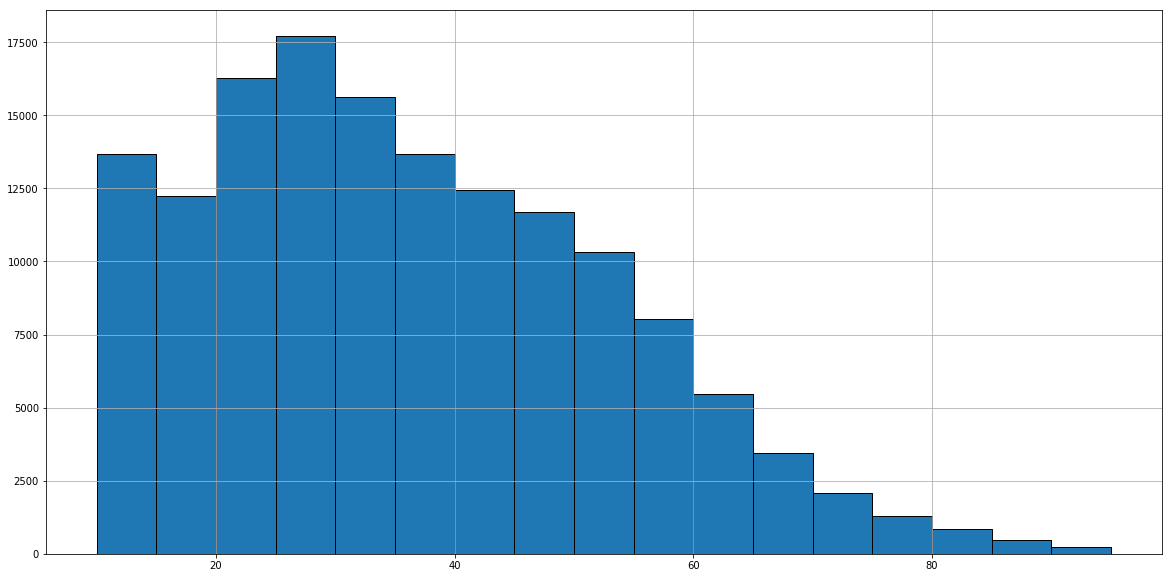

<Figure size 1440x720 with 0 Axes>

In [14]:
victim['Victim Age'].dropna().hist(bins=bins, edgecolor='black', figsize=(20,10))

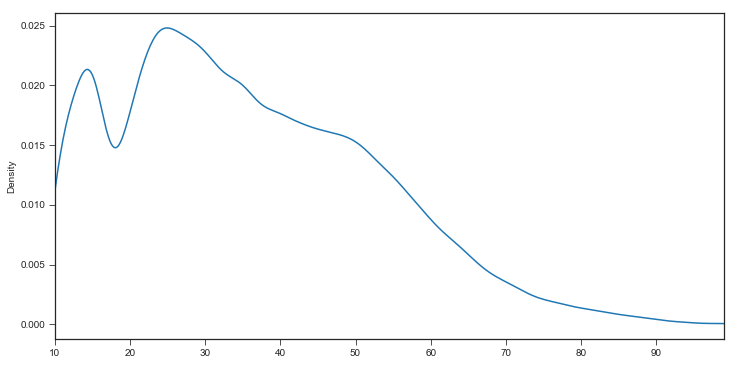

In [26]:
victim['Victim Age'].dropna().plot(kind="density", xlim=(victim['Victim Age'].min(), victim['Victim Age'].max()));

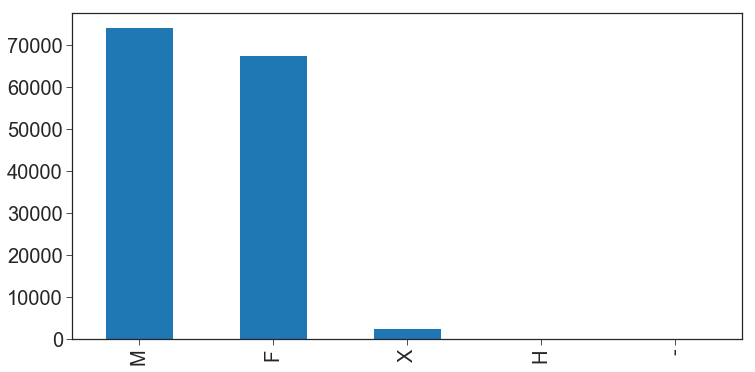

In [27]:
victim['Victim Sex'].dropna().value_counts().plot(kind="bar", fontsize=20);

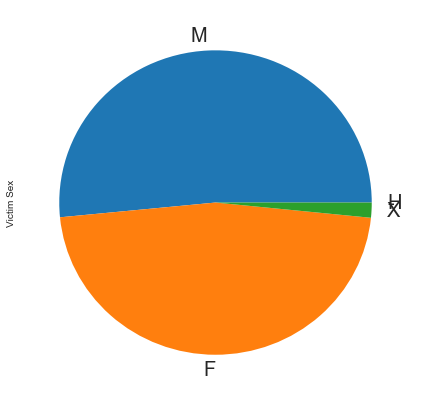

In [28]:
victim[victim[
    (victim["Victim Sex"]=="F") |
    (victim["Victim Sex"]=="X") |
    (victim["Victim Sex"]=="M")]]['Victim Sex'].dropna().value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

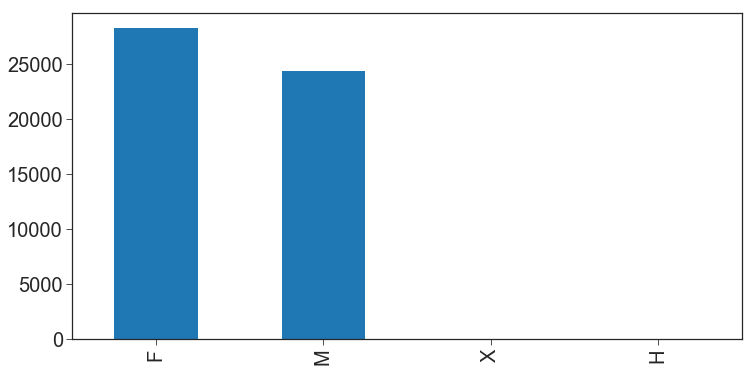

In [29]:
# Number of Victims according to Sex of the Victim b/w the age group 20 and 35 years
victim[(victim['Victim Age'] >= 20) & (victim['Victim Age'] <= 35)]['Victim Sex'].dropna().value_counts().plot(kind="bar", fontsize=20);

In [30]:
victim["Victim Sex"].unique()

array(['F', 'M', 'X', nan, 'H', '-'], dtype=object)

In [72]:
victim["Victim Sex"].value_counts()

M    74099
F    67355
X     2291
H        4
-        1
Name: Victim Sex, dtype: int64

In [15]:
victim = df[['Victim Age', 'Victim Sex', 'Victim Descent']]

In [16]:
victim = victim[
    (victim["Victim Sex"]=="F") |
    (victim["Victim Sex"]=="X") |
    (victim["Victim Sex"]=="M")]

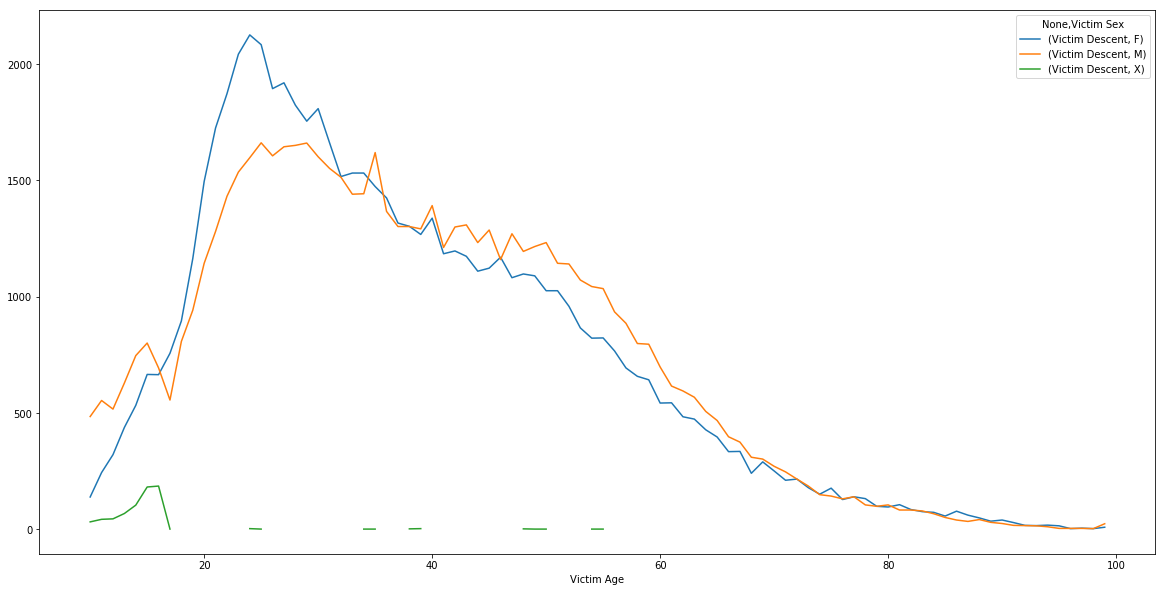

In [19]:
pd.pivot_table(
    victim, index="Victim Age", columns="Victim Sex", aggfunc=len).plot(figsize=(20, 10))

## Происхождение

Descent Code: 

* A - Other Asian
* B - Black
* C - Chinese 
* D - Cambodian 
* F - Filipino 
* G - Guamanian 
* H - Hispanic/Latin/Mexican 
* I - American Indian/Alaskan Native 
* J - Japanese 
* K - Korean 
* L - Laotian 
* O - Other 
* P - Pacific Islander 
* S - Samoan 
* U - Hawaiian 
* V - Vietnamese 
* W - White 
* X - Unknown 
*Z - Asian Indian

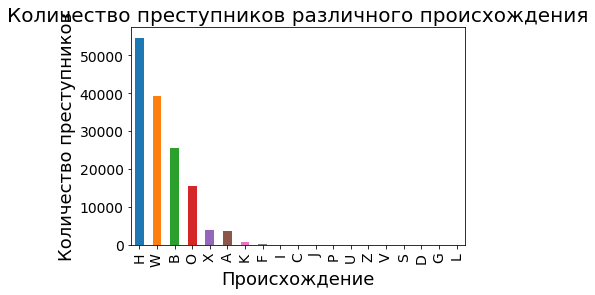

In [20]:
victim["Victim Descent"].value_counts().plot(kind="bar", fontsize=14)
plt.xlabel("Происхождение", size = 18)
plt.ylabel("Количество преступников", size = 18)
plt.title("Количество преступников различного происхождения", size=20)
plt.savefig("victim_descent.png", dpi=300)

In [25]:
victim["Victim Descent"].value_counts()

H    54627
W    39321
B    25511
O    15476
X     4046
A     3660
K      695
F      195
I       73
C       56
J       30
P       25
U       11
Z        5
V        4
S        2
D        2
G        1
L        1
Name: Victim Descent, dtype: int64

In [30]:
pd.pivot_table(victim, columns='Victim Sex', index='Victim Descent', aggfunc=len) / victim["Victim Descent"].value_counts()

ValueError: cannot join with no level specified and no overlapping names

## Area

In [48]:
area = df[['Area ID', 'Area Name', 'Reporting District', 'Location ']]

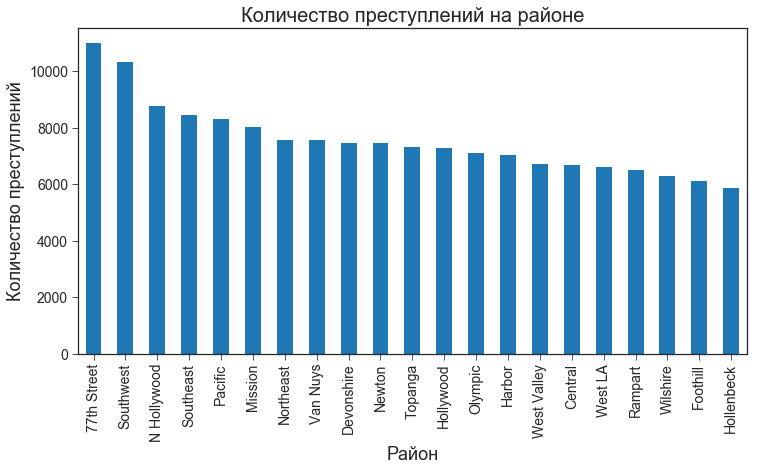

In [58]:
area["Area Name"].value_counts().plot(kind="bar", fontsize=14)
plt.xlabel("Район", size = 18)
plt.ylabel("Количество преступлений", size = 18)
plt.title("Количество преступлений на районе", size=20)

## Top crimes

In [54]:
crime = df[['Crime Code', 'Crime Code Description']]

In [55]:
crime['Crime Code Description'].value_counts()[:10]

BATTERY - SIMPLE ASSAULT                                        14424
VEHICLE - STOLEN                                                12248
BURGLARY FROM VEHICLE                                           12124
BURGLARY                                                        11581
THEFT PLAIN - PETTY ($950 & UNDER)                              11367
THEFT OF IDENTITY                                               10255
INTIMATE PARTNER - SIMPLE ASSAULT                                8588
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     8036
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         7199
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   6705
Name: Crime Code Description, dtype: int64

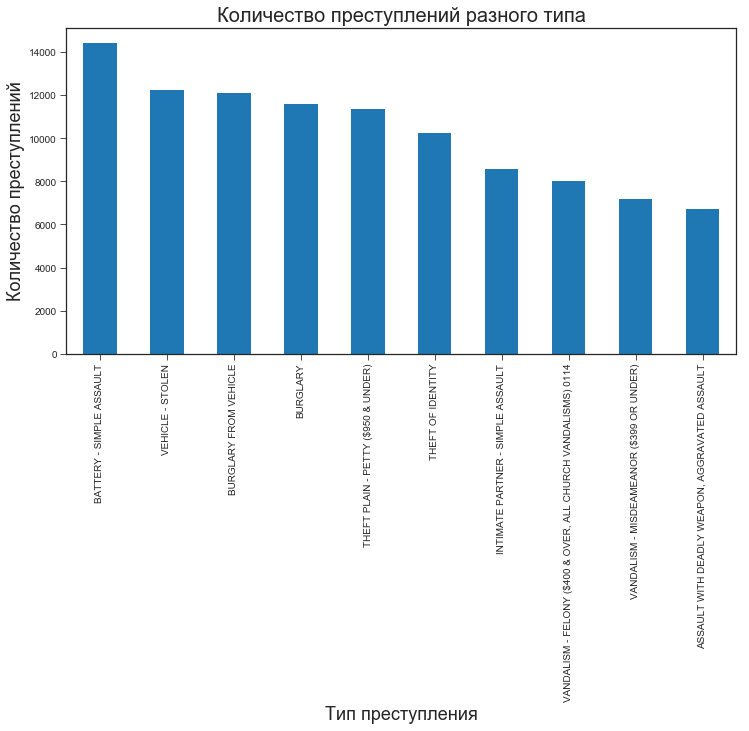

In [59]:
crime['Crime Code Description'].value_counts()[:10].plot(kind="bar");
plt.xlabel("Тип преступления", size = 18)
plt.ylabel("Количество преступлений", size = 18)
plt.title("Количество преступлений разного типа", size=20)

## Crime and Area

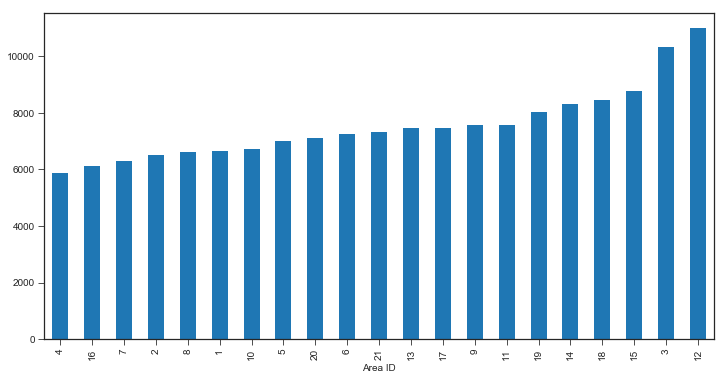

In [351]:
df.groupby("Area ID").size().sort_values().plot(kind="bar")

In [355]:
xtab_sex_descent = pd.pivot_table(
    victim[["Victim Sex", "Victim Descent"]],
    index="Victim Sex",
    columns="Victim Descent",
    aggfunc=len).fillna(0)

In [356]:
xtab_sex_descent

Victim Descent,A,B,C,D,F,G,H,I,J,K,L,O,P,S,U,V,W,X,Z
Victim Sex,,,,,,,,,,,,,,,,,,,
F,1869.0,14930.0,26.0,1.0,111.0,1.0,27565.0,19.0,18.0,351.0,1.0,5331.0,12.0,1.0,5.0,2.0,16956.0,152.0,2.0
M,1791.0,10581.0,30.0,1.0,84.0,0.0,27062.0,54.0,12.0,343.0,0.0,10145.0,13.0,1.0,6.0,2.0,22365.0,1604.0,3.0
X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2290.0,0.0


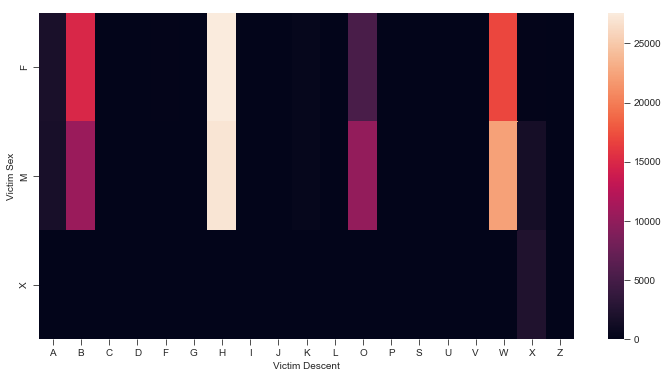

In [357]:
sns.heatmap(xtab_sex_descent);

![Карта LA](https://www.partneresi.com/sites/default/files/methane-zone-map-los-angeles.jpg)

In [264]:
la_geo_df = gpd.read_file("crime-in-los-angeles/shapes")

In [281]:
la_geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 9 columns):
OBJECTID    1135 non-null int64
REPDIST     1135 non-null int64
PREC        1135 non-null int64
APREC       1135 non-null object
BUREAU      1135 non-null object
BASICCAR    1135 non-null object
TOOLTIP     1135 non-null object
geometry    1135 non-null object
crimes      1135 non-null int64
dtypes: int64(4), object(5)
memory usage: 79.9+ KB


In [240]:
la_geo_df.head()

,OBJECTID,REPDIST,PREC,APREC,BUREAU,BASICCAR,TOOLTIP,geometry
0,1,1901,19,MISSION,VALLEY BUREAU,19A1,Bureau: VALLEY BUREAU\nDistrict: 1901\nDivisio...,POLYGON ((-118.5073592270222 34.33464042438231...
1,2,1705,17,DEVONSHIRE,VALLEY BUREAU,17A35,Bureau: VALLEY BUREAU\nDistrict: 1705\nDivisio...,POLYGON ((-118.5073592270222 34.33464042438231...
2,3,1902,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1902\nDivisio...,POLYGON ((-118.4518247956019 34.32404830717866...
3,4,1903,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1903\nDivisio...,POLYGON ((-118.4518247956019 34.32404830717866...
4,5,1904,19,MISSION,VALLEY BUREAU,19A7,Bureau: VALLEY BUREAU\nDistrict: 1904\nDivisio...,POLYGON ((-118.4518247956019 34.32404830717866...


In [241]:
la_geo_df = la_geo_df.rename(columns={'PREC': "Area ID"})

In [358]:
gb_area_crimes = df.groupby("Area ID").size()

In [359]:
la_geo_df["crimes"] = la_geo_df["PREC"].apply(lambda x: gb_area_crimes[x])

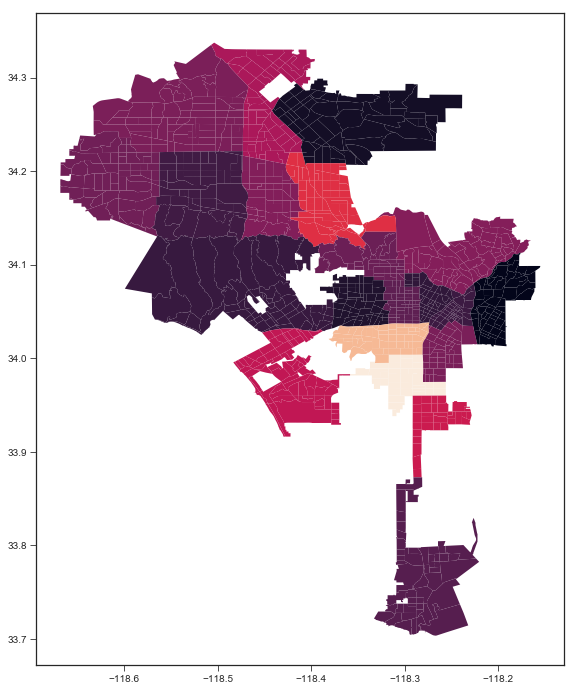

In [360]:
la_map = la_geo_df.plot(column="crimes", figsize=(12, 12));

In [361]:
def clean_coords(coords: "строка с координатами вида '(34.0699, -118.3511)'"):
    if (type(coords) == str) & (coords != "(0, 0)"):
        lat, lon = coords.split()
        lat = float(lat[1:-1])
        lon = float(lon[:-1])
        return lon, lat
    else:
        return None

In [362]:
df["Location"] = df["Location "].apply(clean_coords)

In [363]:
df = df.dropna(subset=["Location"])

In [372]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in df["Location"].tolist()]
crs = {'init': 'epsg:4326'}
crimes_geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [365]:
crimes_geo_df.crs

{'init': 'epsg:4326'}

In [366]:
la_geo_df.crs

{'init': 'epsg:4326'}

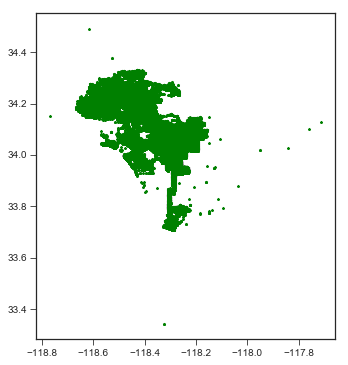

In [367]:
crimes_geo_df.plot(marker='*', color='green', markersize=5)

In [373]:
crimes_geo_df

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Location,geometry
0,854711,140717183,2014-12-08,2014-12-08,730,7,Wilshire,734,110,CRIMINAL HOMICIDE,...,Adult Other,110.0,NaN,NaN,NaN,300 HAUSER BL,NaN,"(34.0699, -118.3511)","(-118.3511, 34.0699)",POINT (-118.3511 34.0699)
1,446667,111427865,2011-09-29,2011-09-29,1940,14,Pacific,1494,440,THEFT PLAIN - PETTY ($950 & UNDER),...,Invest Cont,440.0,NaN,NaN,NaN,500 WORLD WAY,NaN,"(33.9427, -118.4053)","(-118.4053, 33.9427)",POINT (-118.4053 33.9427)
2,712073,122120055,2012-12-18,2012-12-06,1200,21,Topanga,2148,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,20100 VANOWEN ST,NaN,"(34.1938, -118.571)","(-118.571, 34.1938)",POINT (-118.571 34.1938)
3,1133953,151431168,2015-12-25,2015-12-25,1840,14,Pacific,1494,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,Invest Cont,442.0,NaN,NaN,NaN,300 WORLD WAY,NaN,"(33.944, -118.4073)","(-118.4073, 33.944)",POINT (-118.4073 33.944)
4,681226,121816261,2012-08-23,2012-08-22,2020,18,Southeast,1824,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,CENTURY BL,AVALON BL,"(33.9456, -118.2652)","(-118.2652, 33.9456)",POINT (-118.2652 33.9456)
5,1075904,150911874,2015-06-09,2015-05-06,1200,9,Van Nuys,904,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,7400 KESTER AV,NaN,"(34.2084, -118.4599)","(-118.4599, 34.2084)",POINT (-118.4599 34.2084)
6,852584,140713230,2014-08-27,2014-08-02,1920,7,Wilshire,724,440,THEFT PLAIN - PETTY ($950 & UNDER),...,Invest Cont,440.0,NaN,NaN,NaN,100 THE GROVE DR,NaN,"(34.0761, -118.3563)","(-118.3563, 34.0761)",POINT (-118.3563 34.0761)
7,1124711,151408603,2015-03-02,2015-03-01,1400,14,Pacific,1465,320,"BURGLARY, ATTEMPTED",...,Invest Cont,320.0,NaN,NaN,NaN,12200 ANETA ST,NaN,"(33.9846, -118.4103)","(-118.4103, 33.9846)",POINT (-118.4103 33.9846)
8,1328952,161226336,2016-10-26,2016-10-25,2300,12,77th Street,1243,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,2000 W FLORENCE AV,NaN,"(33.979, -118.3112)","(-118.3112, 33.979)",POINT (-118.3112 33.979)
9,106291,101219690,2010-07-22,2010-07-21,1850,12,77th Street,1258,901,VIOLATION OF RESTRAINING ORDER,...,Invest Cont,901.0,NaN,NaN,NaN,7600 S MAIN ST,NaN,"(33.9709, -118.2739)","(-118.2739, 33.9709)",POINT (-118.2739 33.9709)


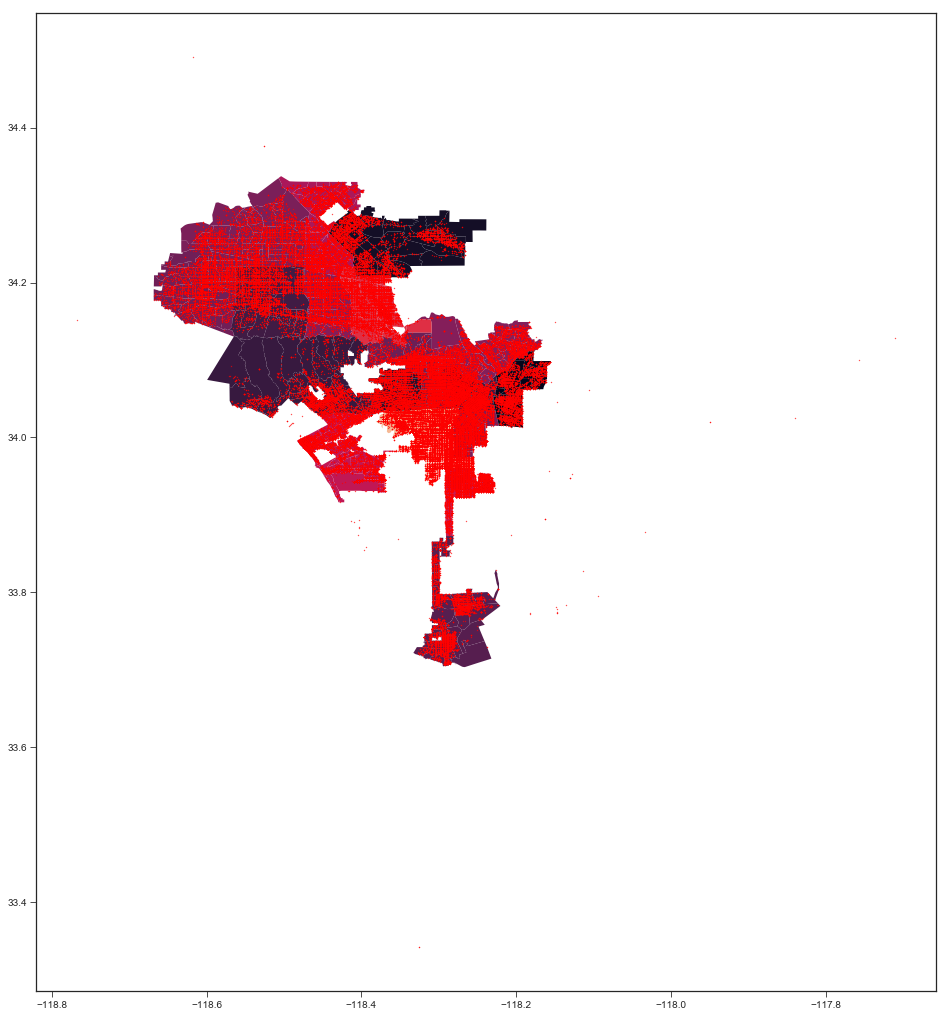

In [369]:
# Create Matplotlib figure
fig, ax = plt.subplots(figsize=(18, 18))

# Set Axes to equal (otherwise plot looks weird)
ax.set_aspect('equal')

# Plot GeoDataFrame on Axis ax
la_geo_df.plot(ax=ax, column="crimes")
crimes_geo_df.plot(ax=ax, marker='o', color='red', markersize=0.1)
plt.figure(figsize=(20,10))

In [374]:
crimes_geo_df.columns

Index(['Unnamed: 0', 'DR Number', 'Date Reported', 'Date Occurred',
       'Time Occurred', 'Area ID', 'Area Name', 'Reporting District',
       'Crime Code', 'Crime Code Description', 'MO Codes', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location ', 'Location',
       'geometry'],
      dtype='object')

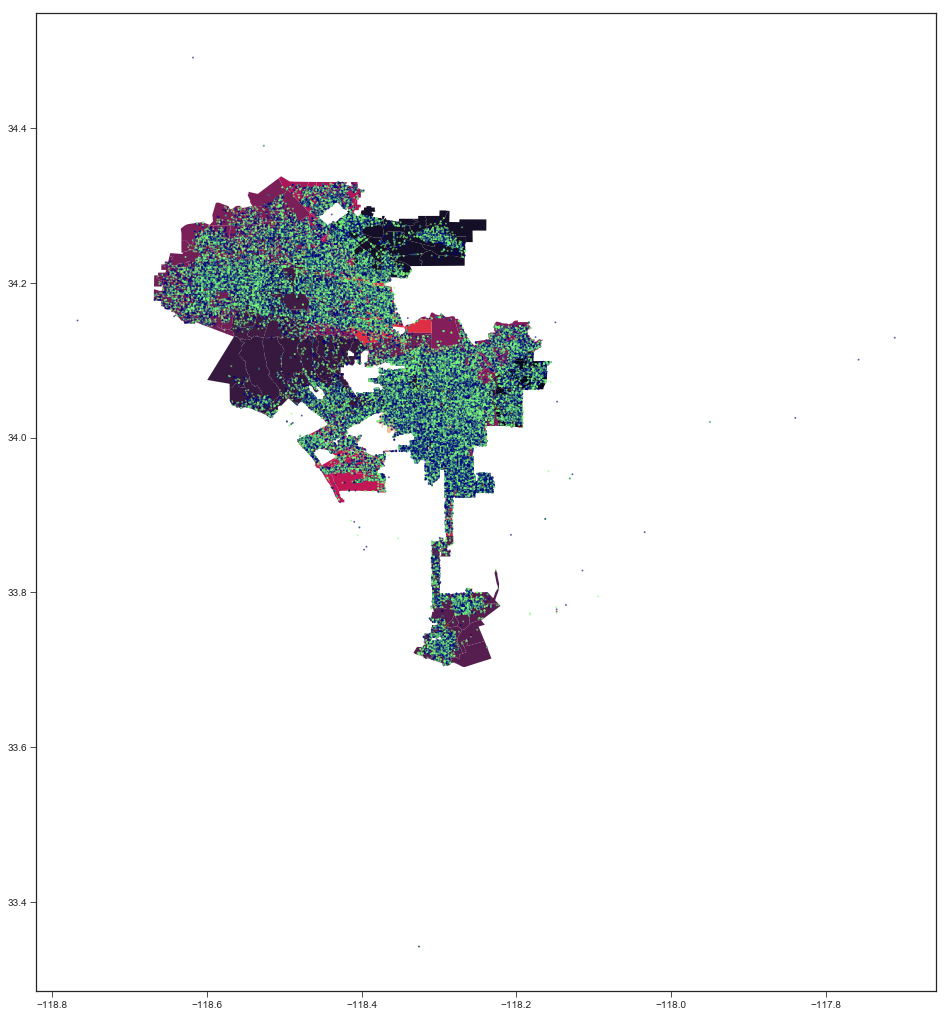

In [391]:
# Create Matplotlib figure
fig, ax = plt.subplots(figsize=(18, 18))

# Set Axes to equal (otherwise plot looks weird)
ax.set_aspect('equal')

# Plot GeoDataFrame on Axis ax
la_geo_df.plot(ax=ax, column="crimes")
crimes_geo_df.plot(ax=ax, marker='o', alpha=0.5, markersize=1, column="Victim Sex", cmap='jet')
plt.figure(figsize=(20,10))